
# PCA and K-Means Clustering

## Contents
- Introduction
- Algorithm
    - PCA
    - K-Means Clustering
- Illustration
- Pros and Cons
- Code and application

## Introduction
- **Principal Component Analysis (PCA)**, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets. The kept dimensions still contain the most variance (information) of features.

- **K-Means Clustering** is the algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

## Algorithm
### PCA
The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i$-th vector is the direction of a line that best fits the data while being orthogonal to the first $i-1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared perpendicular distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

Consider an $n*p$ data matrix $X$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the n rows represents a different repetition of the experiment, and each of the p columns gives a particular kind of feature (say, the results from a particular sensor).

The $k$-th component can be found by subtracting the first $k$ principal components from $X$:
$$\hat{X_{k}}= X - \sum_{s=1}^{k-1}Xw_{(s)}w^{T}_{(s)} $$
and the wieght matrix which extracs the maximum variance from the new data martix
$$w_{(k)} = \arg \max_{||X||=1}{||\hat{X_k}w||^2} = \arg \max{\frac{w^T\hat{X_k}^T\hat{X_k}w}{w^Tw}} $$

The full principal components decomposition of X is given by 
$$ T = XW $$

### K-Means Clustering
- K-Means Clustering is the algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

Given a set of observation $(x_1,x_2,...x_n)$, where each where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets $\textbf{S} ={S_1,S_2,...S_k}$ so as to mminimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:
$$
\arg \min_{\textbf{S}}\sum_{i=1}^{k}\sum_{X \in S_i}||X-u_i||^2  = \arg \min_{\textbf{s}}\sum_{i=1}^{k}|S_i|Var(S_i)
$$
where $u_i$ is the mean of points in $S_i$. This is equivalent to minimizing the pairwise squared deviation of points in the same cluster:
$$
\arg \min_{\textbf{S}}\sum_{i=1}^{k}\frac{1}{|S_i|}\sum_{\textbf{x,y}\in S_i}||\textbf{x-y}||^2
$$
The equivalence can be deduced from identity $ |S_i| \sum_{X \in S_i}||x-u_i||^2 = \sum_{x \neq y \in S_i}{||x-y||^2} $. Since the total variance is constant, this is equivalent to maximizing the sum of squared deviations between points in different clusters (between-cluster sum of squares, BCSS),.[1] This deterministic relationship is also related to the law of total variance in probability theory.

Algorithm
1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids $(c_1, c_2,...,c_k)$ without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
- For each data point $x_i$, compute the sum of the squared distance between data point and all centroids, .
- Assign $x_i$ to the nearest centroid.
- Compute the centroids $c_j$ for the clusters by taking the average of the all data points that belong to each cluster.


## Illustration

### PCA
PCA transform the data from original space to a new space but still keeping most of variance (information) of original data.

![avatar](images/fig_pca_principal_component_analysis.png)

### K-Means Clustering
The following illustration visualize each step of K-Means clustering algorithm.

![avatar](images/kmeans_illustration.png)

## Pros and Cons

### Pros
- Relatively simple to implement.
- Scales to large data sets.
- Guarantees convergence.
- Can warm-start the positions of centroids.
- Easily adapts to new examples.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

### Cons
- Choosing $K$ manually.
- Being dependent on initial values.
- Clustering data of varying sizes and density.
- Clustering outliers.
- Scaling with number of dimensions.
- Curse of Dimensionality and Spectral Clustering

## Code and Application

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

We use breast cancer dataset to present PCA. We transform the 30-dimensional dataset into two dimensions. Then, we visualize the dataset, finding that different classes can be easily seperate with each other after PCA. Thus, PCA can be used as feature selection and transformation to reduce the complexity.

data keys = dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


No handles with labels found to put in legend.


the original data shape = (569, 30)
the output x shape = (569, 3)


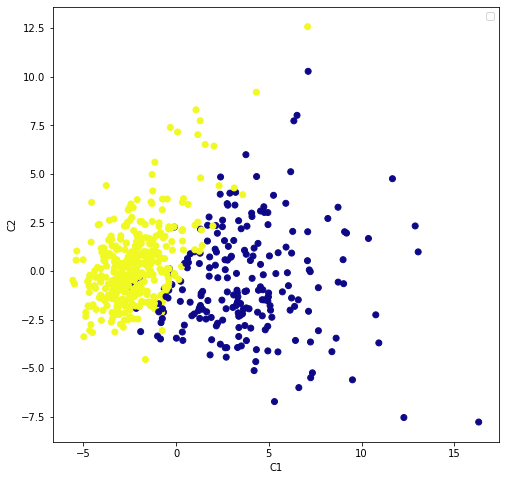

In [12]:
data = load_breast_cancer()
print(f"data keys = {data.keys()}")
data["data"].shape

df1 = pd.DataFrame(data["data"],columns=data["feature_names"])


scaling = StandardScaler()
scaling.fit(df1)
scaled_data = scaling.transform(df1)
pca = PCA(n_components=3)
pca.fit(scaled_data)
x = pca.transform(scaled_data)
print(f"the original data shape = {data['data'].shape}")
print(f"the output x shape = {x.shape}")

plt.figure(figsize=(8,8))
plt.scatter(x[:,0],x[:,1],c = data["target"],cmap = "plasma")
plt.xlabel("C1")
plt.ylabel("C2")
plt.legend()

In [13]:
import seaborn as sns
from sklearn.cluster import KMeans

We use Iris datasets to implement K-Means. Then, we use inertia to determine which K to choose. Inertia measures how well a dataset was clustered by K-Means, it is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. We predict each centroid as a class, and visualize the prediction of each class.  

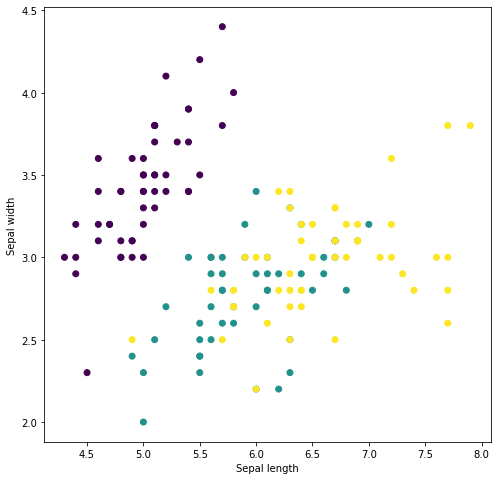

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# plot the data
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


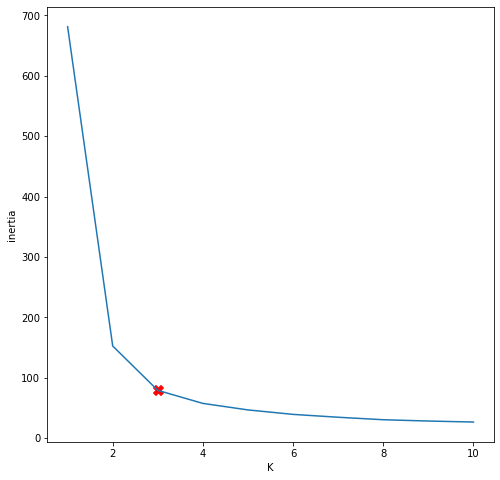

In [6]:
from sklearn.cluster import KMeans

inertia_list = []
for k in range(1,11):
    model = KMeans(n_clusters=k,init="k-means++")
    model.fit(X)
    inertia_list.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11),inertia_list)
plt.scatter(3,inertia_list[2],marker="X",s=100,c="r")
plt.ylabel("inertia")
plt.xlabel("K")
plt.show()

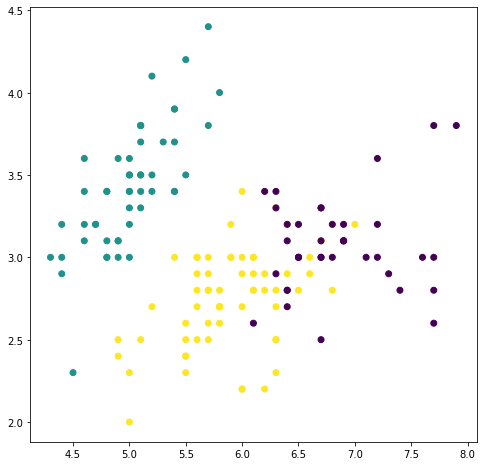

In [7]:
kmeans = KMeans(n_clusters=3,init="k-means++")
kmeans.fit(X)
y_predict = kmeans.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y_predict)
plt.show()

Then we use K-Means to do the Image Segmentation. Every pixel is made of three original color (r,g,b), so we choose K as 3 to implement K-Means on the image segmentation.

image shape = (6000, 4000, 3)


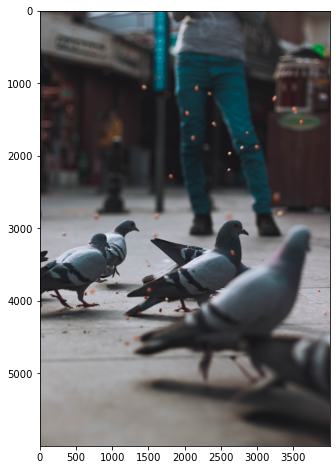

(24000000, 3)


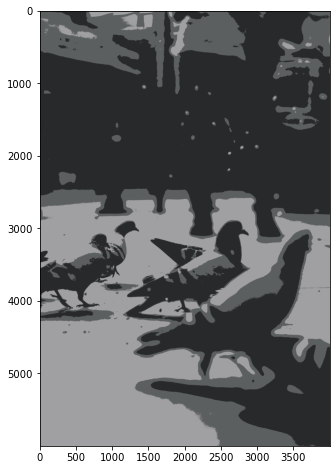

In [10]:
from matplotlib.image import imread
image = imread("images/4k-image.jpg")
image = image/255
print(f"image shape = {image.shape}")
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()


X = image.reshape(-1,3)
k = 3
kmeans = KMeans(n_clusters=k).fit(X)
new_image = kmeans.cluster_centers_[kmeans.labels_]
new_image = new_image.reshape(image.shape)

plt.figure(figsize=(8,8))
plt.imshow(new_image)
plt.show()

What if we combine K-Means and supervised learning method to do the semi-supervised learning. We use digit dataset and do the comparision between the logistic regression and K-Means plus logistic regression pipeline. The accuracy shows that the logistic regression has accuracy of 95.11%, while the pipline, combining logistic regression and K-Means, has the accuracy of 95.34%. The accuracy has increased a little bit when using semi-supervised learning.

In [18]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
pipeline = Pipeline(
    [("KMeans",KMeans(n_clusters=50)),
     ("logistic_regression",LogisticRegression())]
)
pipeline.fit(X_train,y_train)
print(f"pipeline accuracy score {pipeline.score(X_test,y_test)}")

clf = LogisticRegression()
clf.fit(X_train,y_train)
print(f"logistic regression clf accuracy score={clf.score(X_test,y_test)}")

pipeline accuracy score 0.9533333333333334
logistic regression clf accuracy score=0.9511111111111111
